In [1]:
import Preprocessing_aug_prova2 as prep
import RootPreprocessing_new as rooprep
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
from keras import models
from sklearn import metrics

Welcome to JupyROOT 6.28/06


In [4]:
test_list = ["/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/good_data_last4/response.drdf"]
labels_list = [ "/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/good_data_last4/sensors.root"]

In [5]:
test_ds, test_labels = prep.DatasetCut(labels_list, test_list)

In [6]:
saved_model = models.load_model("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/ultima_versione_buoni/tf_model_new/good_models/cams_model_bestever_newdata.keras")

In [7]:
weights = saved_model.get_weights()

In [8]:
predictions = saved_model.predict(test_ds)

1676/1676 [==============================] - 4s 2ms/step


In [9]:
predictions = np.squeeze(predictions)

In [10]:
predictions_of_0 = []
predictions_of_1 = []

for i in range(len(predictions)):
    if test_labels[i] == 0: # cam accecate
        predictions_of_0.append(predictions[i])
    elif test_labels[i] == 1: #cam non accecate
        predictions_of_1.append(predictions[i])

real_predictions = {0: predictions_of_0, 1: predictions_of_1}

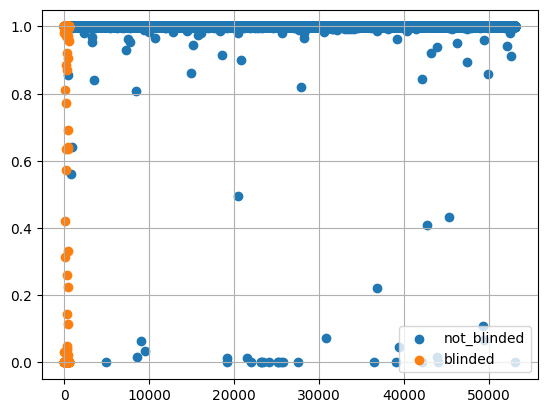

In [11]:
ev_list_1 = range(len(real_predictions[1]))
ev_list_0 = range(len(real_predictions[0]))

plt.scatter(ev_list_1, real_predictions[1],label='not_blinded')
plt.scatter(ev_list_0, real_predictions[0],label='blinded')

# ev_list = range(len(test_ds))
# plt.scatter(ev_list, predictions)
plt.legend(loc='lower right') 

plt.grid()
plt.show()

In [12]:
i = 0
predictions_approx = []
for value in predictions:
    #value_approx = int(round(value,0))
    if value >= 0.5:
        value_approx = 1
    if value < 0.5:
        value_approx = 0
    predictions_approx.append(value_approx)

predictions_approx = np.asarray(predictions_approx)

[[  265   261]
 [   32 53071]]


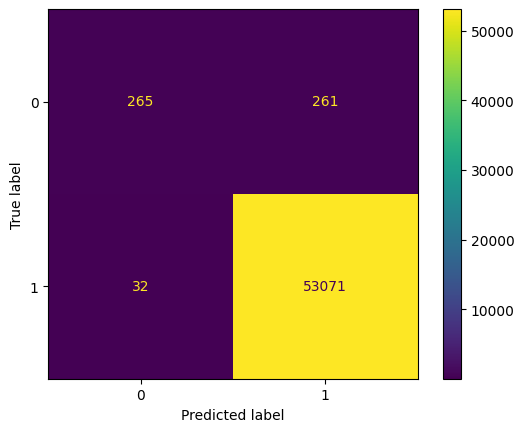

In [13]:
#test_labels ha shape 4860
cm = metrics.confusion_matrix(test_labels, predictions_approx)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

In [14]:
mismatch_list = []
for i in range(len(test_ds)):
    if test_labels[i] != predictions_approx[i]:
        mismatch_list.append(i)

fp_list = []
for i in range(len(test_ds)):
    if test_labels[i] == 1 and predictions_approx[i] == 0:
        fp_list.append(i)

fn_list = []
for i in range(len(test_ds)):
    if test_labels[i] == 0 and predictions_approx[i] == 1:
        fn_list.append(i)

In [15]:
#calcolo i fotoni totali sulle camere predette male
tot_photons_all_wrong_cams = []
for i in mismatch_list:
    tot_photons_wrong_cam = np.sum(test_ds[i])
    tot_photons_all_wrong_cams.append(tot_photons_wrong_cam)

10588.554


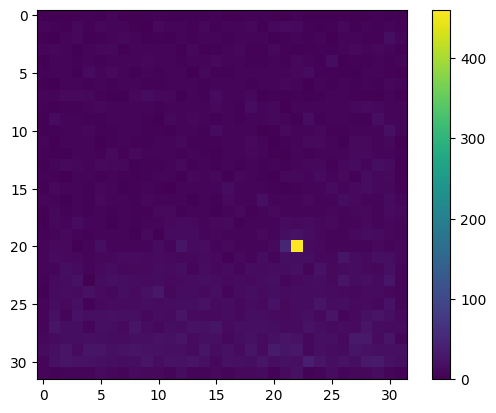

6952.506


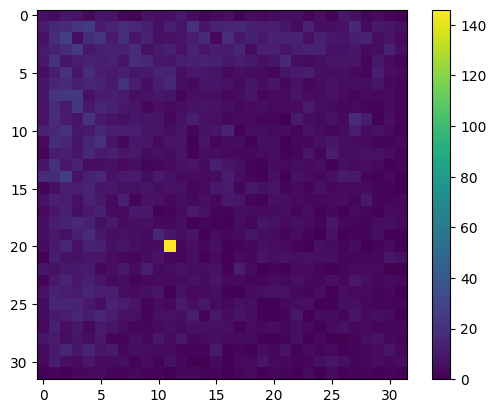

9644.541


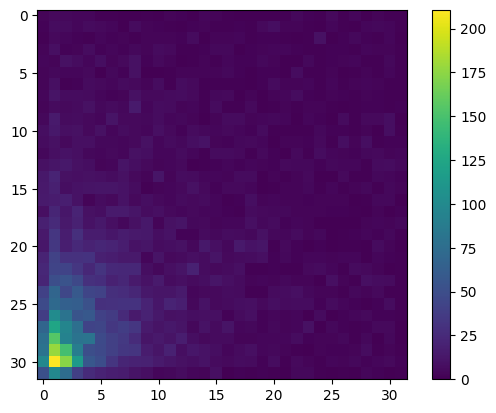

4117.6895


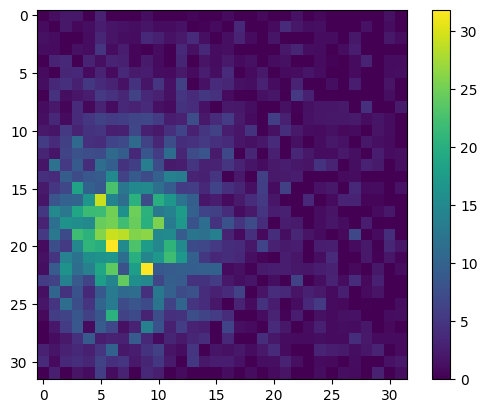

51790.555


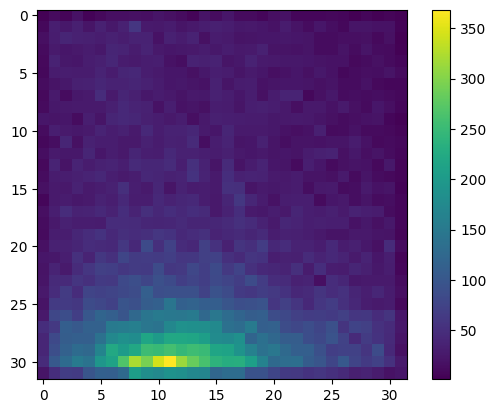

78021.75


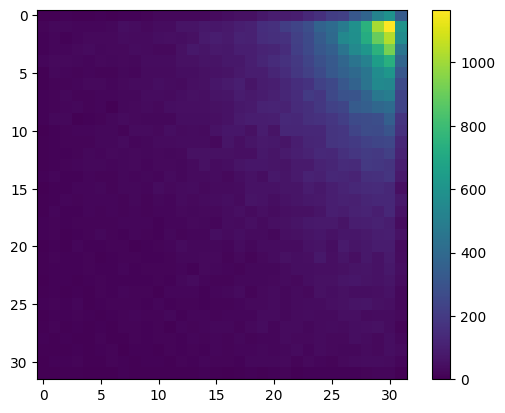

89242.6


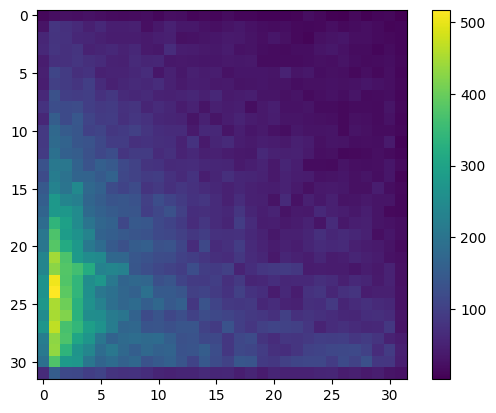

54810.05


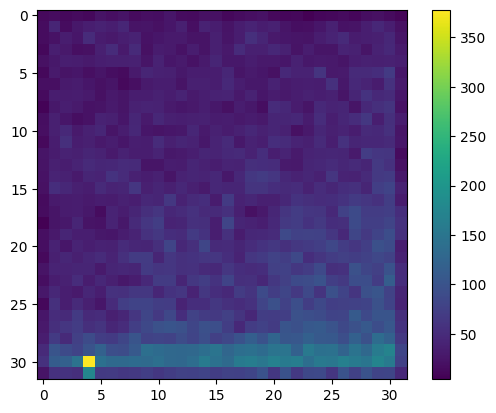

32056.457


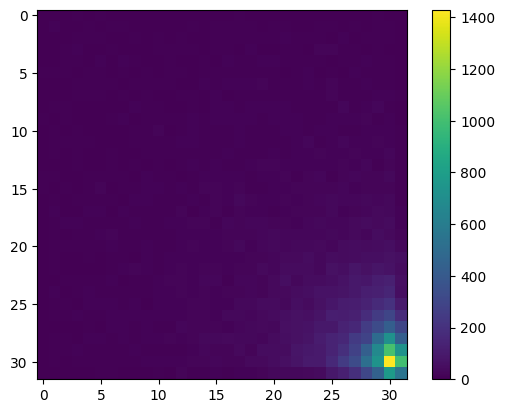

12493.128


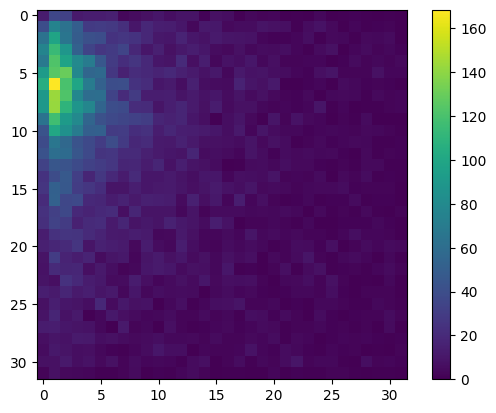

115111.96


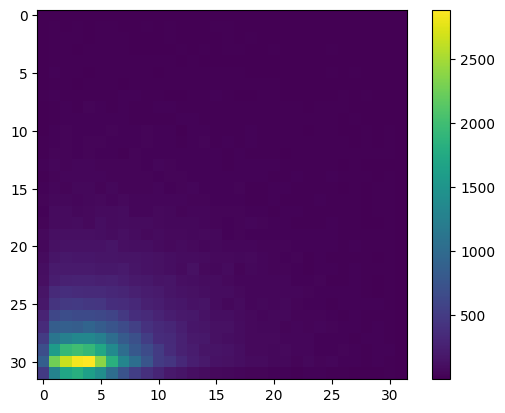

32115.918


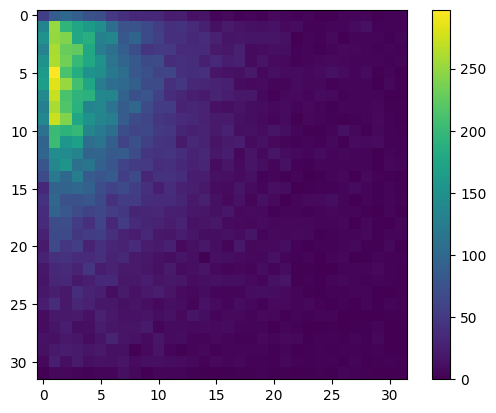

36748.08


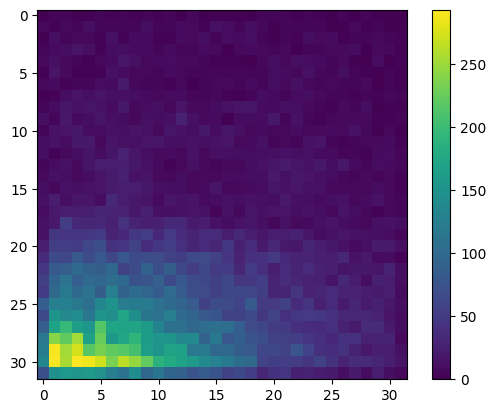

34841.773


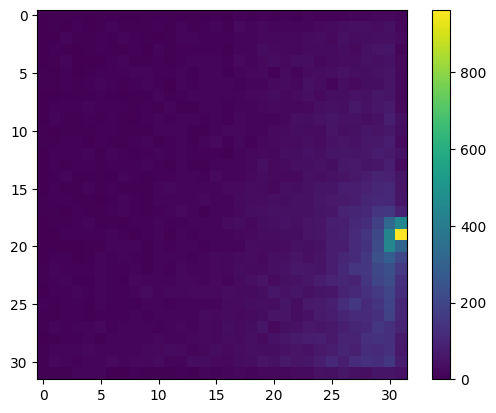

84214.234


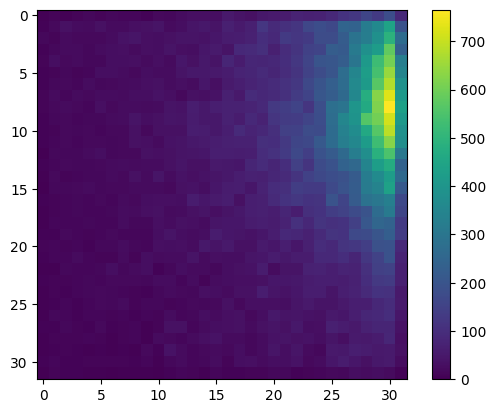

80072.36


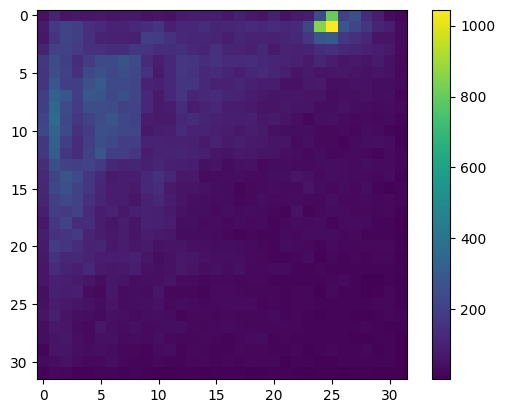

6262.587


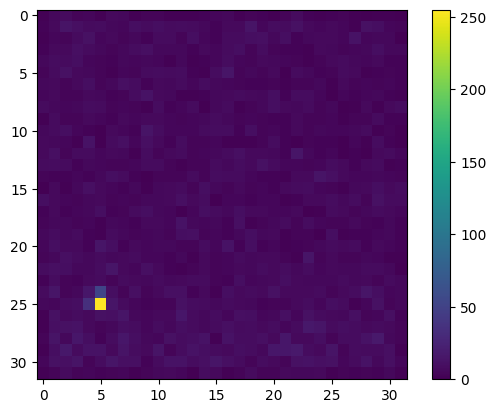

22713.1


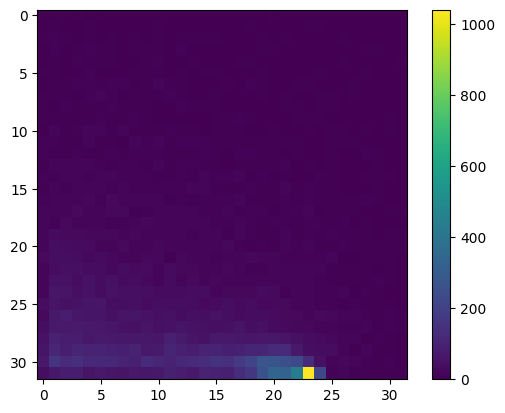

107176.19


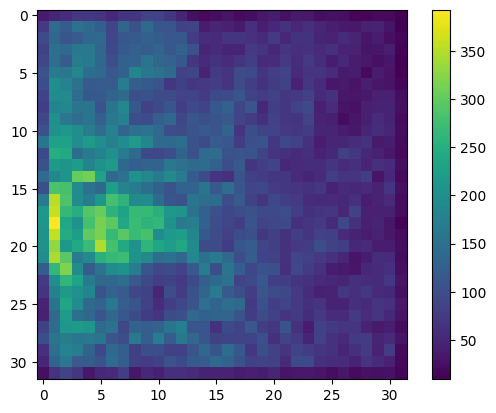

95642.984


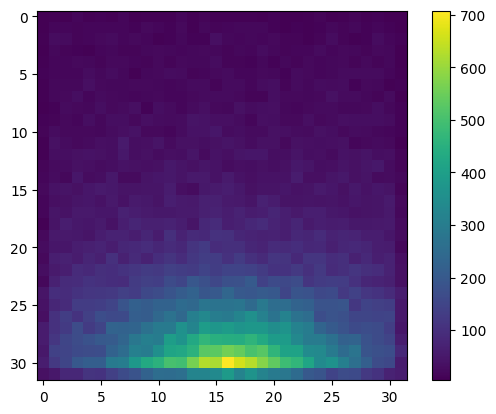

9308.091


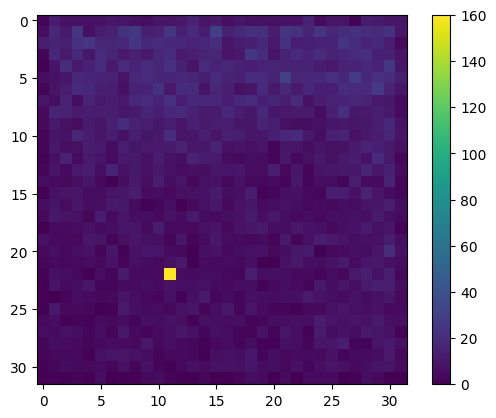

41157.78


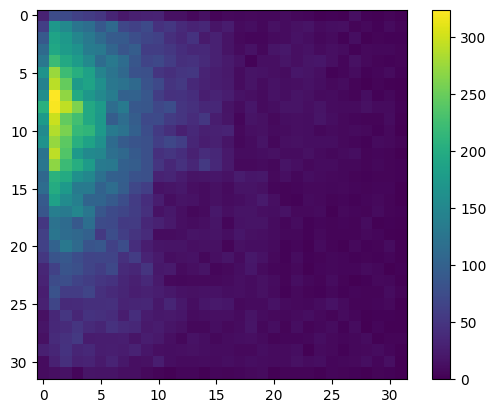

52948.47


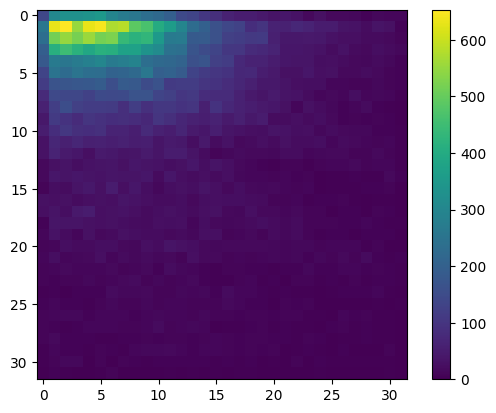

26843.756


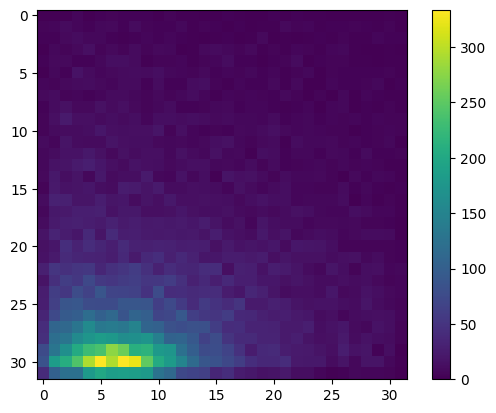

43031.766


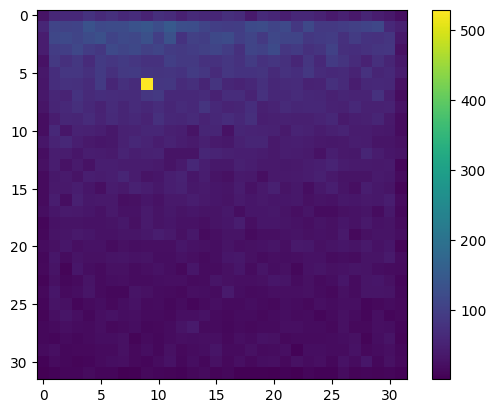

33526.953


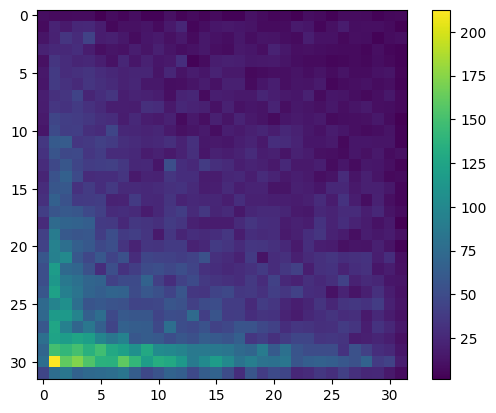

58395.043


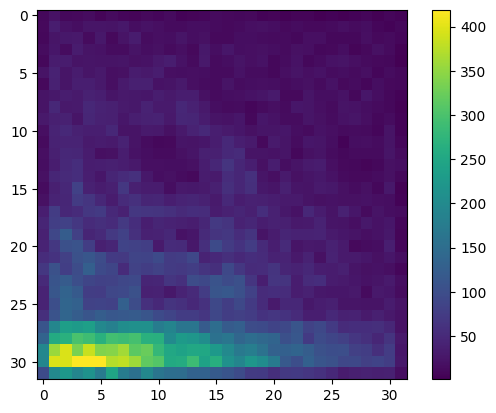

226982.58


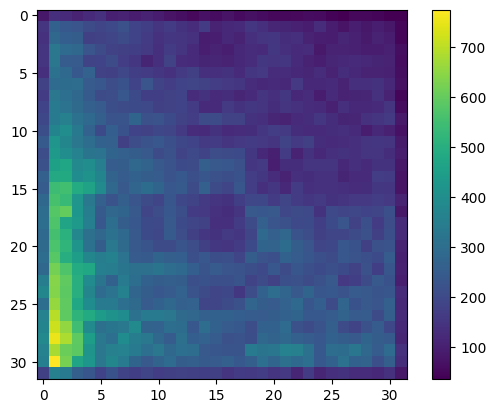

35318.17


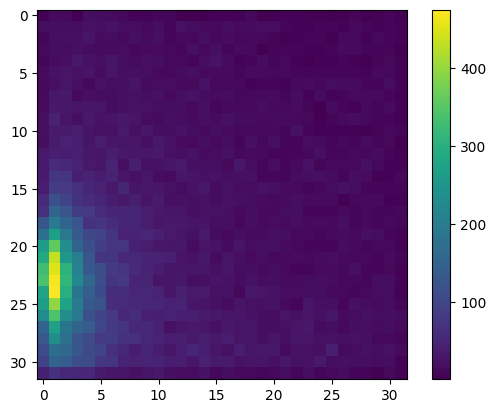

113523.914


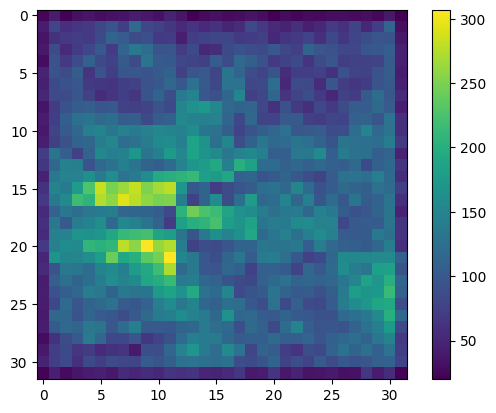

69263.59


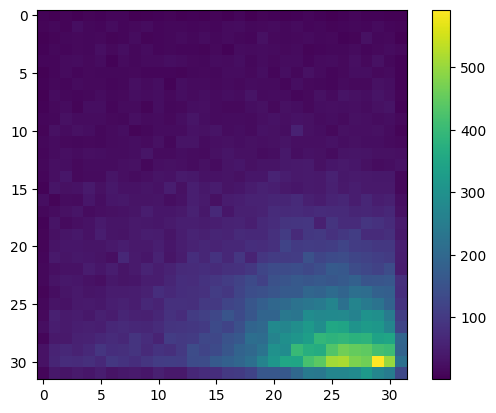

18987.746


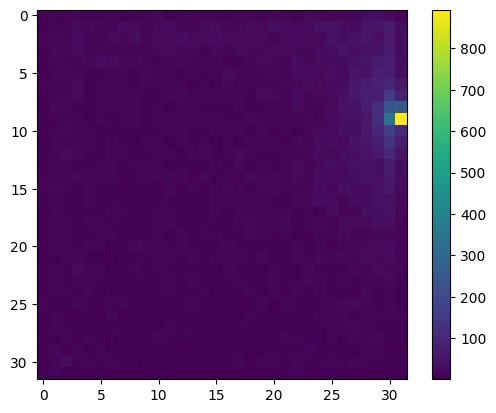

In [16]:
for i in fp_list:
    print(np.sum(test_ds[i]))
    plt.imshow(test_ds[i])
    plt.colorbar()
    plt.show()